## Load libraries and create a Reddit instance

In [4]:
import praw
import pandas as pd
import numpy as np
import json

C:\Users\Jan\miniconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
reddit = praw.Reddit(client_id='2si9BAZhYp5aJQ', client_secret='1oG2S239h-dYs2YjSHgilKiTLanyag', user_agent='WebScraping', username='jpurquico', password='Whatever.0628')

In [10]:
"""
hot_nosleep = []
nosleep = reddit.subreddit('NoSleep').hot(limit=1000)
for post in nosleep:
    if post.selftext == "":
        pass
    else:
        hot_nosleep.append({'title': post.title, 
                            'text_body':post.selftext,
                            'author': post.author,
                            'id': post.id,
                            'num_comments': post.num_comments,
                            'url': post.url,
                            'upvote_ratio': post.upvote_ratio,
                            'score': post.score})
"""

## Create a Reddit object and get posts

In [68]:
nosleep = reddit.subreddit('NoSleep').hot(limit=100)
nosleep_dict = {"title":[],
                "score":[],
                "id":[],
                "url":[],
                "num_comments": [],
                "created": [],
                "body":[], 
                "author": [],
                "upvote_ratio": []}

for post in nosleep:
    if post.selftext == "":
        continue
    else:
        pass
    
    nosleep_dict['title'].append(post.title) 
    nosleep_dict['body'].append(post.selftext)
    nosleep_dict['author'].append(post.author)
    nosleep_dict['id'].append(post.id)
    nosleep_dict['num_comments'].append(post.num_comments)
    nosleep_dict['url'].append(post.url)
    nosleep_dict['upvote_ratio'].append(post.upvote_ratio)
    nosleep_dict['score'].append(post.score)
    nosleep_dict['created'].append(post.created)

In [69]:
nosleep_df = pd.DataFrame(nosleep_dict)

In [70]:
nosleep_df['body']

0     Hello everyone!\n\nI’m sure you’re all very aw...
1     I'm sorry if this is all over the place. This ...
2     Elvis dove beneath the altar as the keyboardis...
3     Hello.\n\nI've never talked about my personal ...
4     The morning after I brought mom's ashes back f...
                            ...                        
93    I visited the relatives of my mother in Sikkim...
94    I barely noticed the letter peeking out of the...
95    ((August 2021))\n\nEmergency Operations, Digit...
96    [Part 1](https://www.reddit.com/r/nosleep/comm...
97    [Part 1](https://www.reddit.com/r/nosleep/comm...
Name: body, Length: 98, dtype: object

## Make a function to facilitate mining

In [113]:
def subreddit_to_dict(subreddit, mod_list, body=True):
    dummy_dict = {"title":[],
                "score":[],
                "id":[],
                "url":[],
                "num_comments": [],
                #"created": [],
                "body":[], 
                "author": [],
                "upvote_ratio": []}
    
    for post in subreddit:
        if post.author in mod_list:  ## remove posts by subreddit mods
            continue
        elif body:
            if post.selftext == "":
                continue
            else:
                pass
                
        dummy_dict['title'].append(post.title) 
        dummy_dict['body'].append(post.selftext)
        dummy_dict['author'].append(post.author)
        dummy_dict['id'].append(post.id)
        dummy_dict['num_comments'].append(post.num_comments)
        dummy_dict['url'].append(post.url)
        dummy_dict['upvote_ratio'].append(post.upvote_ratio)
        dummy_dict['score'].append(post.score)
        #dummy_dict['created'].append(post.created_utc)
    
    return dummy_dict

In [107]:
def get_hot(sub, limit=100, body=False):
    subreddit = reddit.subreddit(sub)
    hot = subreddit.hot(limit=limit)
    mod_list = [mod for mod in subreddit.moderator()]
    
    return subreddit_to_dict(hot, mod_list=mod_list, body=body)

In [108]:
canada_dict = get_hot('canada')

In [109]:
canada_df = pd.DataFrame(canada_dict)

In [110]:
canada_df.head()

,title,score,id,url,num_comments,body,author,upvote_ratio
0,Doug Ford announces new highway that will excl...,645,qsb1kh,https://www.thebeaverton.com/2021/11/doug-ford...,56,,RoutineProcedure,0.89
1,RMS Queen ELIZABETH pulling in New York w US a...,3894,qs0yj3,https://i.redd.it/xnu8bayrp2z71.jpg,157,,developbc,0.98
2,Toronto school board rejects Marie Henein book...,363,qsb7tq,https://www.theglobeandmail.com/canada/article...,257,,PM_ME_DOMINATRIXES,0.91
3,Justin Trudeau calls for clearing cyberspace o...,277,qsaitf,https://nationalpost.com/news/politics/trudeau...,443,,RoutineProcedure,0.72
4,"To fight the opioid crisis, we must decriminal...",216,qsbp3u,https://ipolitics.ca/2021/11/11/to-fight-the-o...,180,,sdbest,0.79


In [111]:
len(canada_df)

98

In [37]:
canada_titles = list(canada_df['title'])

In [41]:
with open("titles.json", 'w') as jsonf:
    json.dump(canada_titles, jsonf)

## Reddit No Sleep

In [123]:
nosleep_df = pd.DataFrame(get_hot('nosleep', limit=110, body=True))

In [124]:
nosleep_df.head(10)

,title,score,id,url,num_comments,body,author,upvote_ratio
0,A lot of you people aren't following The Rules...,748,qs9qa8,https://www.reddit.com/r/nosleep/comments/qs9q...,48,Hello everyone!\n\nI’m sure you’re all very aw...,Zithero,0.97
1,I adopted a retired police dog. It might have ...,740,qs6byh,https://www.reddit.com/r/nosleep/comments/qs6b...,55,I'm sorry if this is all over the place. This ...,Salt-Adeptness-3133,0.96
2,Something is behind the bookshelf behind my bed.,30,qsebfg,https://www.reddit.com/r/nosleep/comments/qseb...,1,Hello.\n\nI've never talked about my personal ...,ashrachell,0.97
3,I'm at the end of my rope with my future mothe...,153,qs5skl,https://www.reddit.com/r/nosleep/comments/qs5s...,12,Elvis dove beneath the altar as the keyboardis...,lightingnations,0.95
4,Someone stole my mother's ashes and now I'm mi...,23,qsdfot,https://www.reddit.com/r/nosleep/comments/qsdf...,0,The morning after I brought mom's ashes back f...,donotshare,0.90
5,I found an old cellphone on my bus ride home. ...,1548,qrmhzz,https://www.reddit.com/r/nosleep/comments/qrmh...,42,\n\nI had just sat down for my ride home on th...,Colourblindness,0.97
6,Evil Breeds Evil,7,qsjitk,https://www.reddit.com/r/nosleep/comments/qsji...,1,In my first week teaching in a Chicago inner c...,BurntSchmidt,1.00
7,"My name is Mike, and I run security for the Da...",84,qs2ckz,https://www.reddit.com/r/nosleep/comments/qs2c...,12,[Part 1](https://www.reddit.com/r/nosleep/comm...,cal_ness,0.94
8,When the time comes don't believe your local n...,734,qrn67y,https://www.reddit.com/r/nosleep/comments/qrn6...,21,Title says it all. I don't care what the docto...,twocantherapper,0.96
9,Any Advice? I Left the Bride's Sister at Home.,136,qrydfd,https://www.reddit.com/r/nosleep/comments/qryd...,13,"I'm a little unsure of where to post this, so ...",tavvyj,0.94


In [122]:
len(nosleep_dict)

108

In [170]:
nosleep_df.to_json('./data/nosleep.json', orient='columns', default_handler=str)

In [5]:
ns_stories = []
with open('data/nosleep.json') as jsonf:
    ns_stories = list(json.load(jsonf)['body'].values())

In [6]:
import re
from nltk import word_tokenize, WordNetLemmatizer
from nltk.corpus import stopwords
from collections import defaultdict
from nltk import pos_tag
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Jan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [8]:
def clean_sent(sent):
    cleaned_sent = re.sub(r"[^\w\s]", ' ', sent.replace('\n', " "))
    return cleaned_sent

In [9]:
lemmatizer = WordNetLemmatizer()
vocab = defaultdict(int)
for story in ns_stories:
    clean = clean_sent(story)
    for word in word_tokenize(clean):
        if word.isalpha():
            if word.lower() not in stopwords.words('english'):
                lemma = lemmatizer.lemmatize(word.lower())
                vocab[lemma] += 1

In [11]:
sorted(vocab, key=vocab.get, reverse=True)[:10]

['like', 'one', 'back', 'could', 'time', 'know', 'would', 'eye', 'get', 'see']

In [10]:
len(ns_stories)

108

In [17]:
tagged_words = pos_tag(list(vocab.keys()))
nouns = []
verbs = []
modifiers = []
other = []
for word, tag in tagged_words:
    if tag.startswith('N'):
        nouns.append(word)
    elif tag.startswith('V'):
        verbs.append(word)
    elif tag.startswith('J') or tag.startswith('R'):
        modifiers.append(word)
    else:
        other.append(word)

In [18]:
len(vocab)

12027

In [19]:
noun_dict = {}
for noun in nouns:
    noun_dict[noun] = vocab[noun]
    
verb_dict = {}
for verb in verbs:
    verb_dict[verb] = vocab[verb]
    
modifier_dict = {}
for mod in modifiers:
    modifier_dict[mod] = vocab[mod]

In [20]:
sorted(noun_dict, key=noun_dict.get, reverse=True)[:10]

['time',
 'eye',
 'get',
 'thing',
 'something',
 'room',
 'way',
 'head',
 'hand',
 'house']

In [21]:
sorted(verb_dict, key=verb_dict.get, reverse=True)[:10]

['know', 'see', 'said', 'got', 'looked', 'go', 'say', 'going', 'made', 'saw']

In [22]:
sorted(modifier_dict, key=modifier_dict.get, reverse=True)[:10]

['back',
 'u',
 'door',
 'still',
 'even',
 'right',
 'never',
 'thought',
 'away',
 'first']

In [15]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def corpus_info(vocab):
    #counter = Counter(word.lower() for word in corpus.words())
    print("Total tokens:", sum(list(vocab.values())))
    print("Vocabulary size:", len(vocab))
    #print("Number of documents:", len(corpus.fileids()))
    print("Most common words:", " ".join(sorted(vocab, key=vocab.get, reverse=True)[:10]))
    #print("Most common words excluding stopwords:", " ".join([pair[0] for pair in counter.most_common(500) if pair[0].isalpha() and pair[0].lower() not in stopwords_set][:10]))
    print("Wordcloud:")
    wordcloud = WordCloud(stopwords = stopwords.words('english')).generate(" ".join(vocab.keys()))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

Total tokens: 117861
Vocabulary size: 12027
Most common words: like one back could time know would eye get see
Wordcloud:


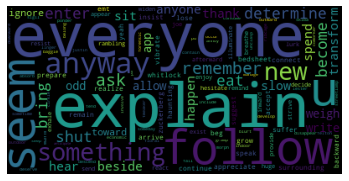

In [16]:
corpus_info(vocab)

Total tokens: 48562
Vocabulary size: 5064
Most common words: time eye get thing something room way head hand house
Wordcloud:


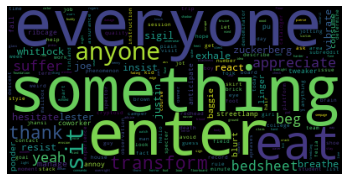

In [23]:
corpus_info(noun_dict)

Total tokens: 29051
Vocabulary size: 3287
Most common words: know see said got looked go say going made saw
Wordcloud:


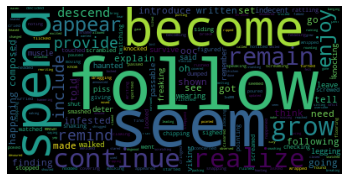

In [24]:
corpus_info(verb_dict)

Total tokens: 32911
Vocabulary size: 3502
Most common words: back u door still even right never thought away first
Wordcloud:


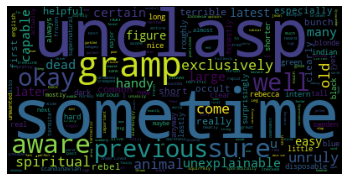

In [25]:
corpus_info(modifier_dict)

### spaCy end-to-end

In [28]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [33]:
spacy_vocab = defaultdict(int)
spacy_noun = defaultdict(int)
spacy_verb = defaultdict(int)
spacy_mod = defaultdict(int)

for story in ns_stories:
    clean = clean_sent(story)
    doc = nlp(clean)
    for token in doc:
        lemma = token.lemma_
        tag = token.tag_
        spacy_vocab[lemma] += 1
        if tag.startswith('N'):
            spacy_noun[lemma] += 1
        elif tag.startswith('V'):
            spacy_verb[lemma] += 1
        elif tag.startswith('R') or tag.startswith('J'):
            spacy_mod[lemma] += 1

Total tokens: 291485
Vocabulary size: 11309
Most common words:   the I be to and    a of it
Wordcloud:


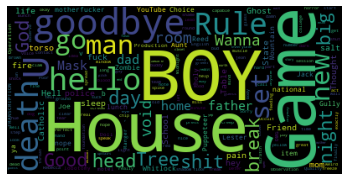

In [36]:
corpus_info(spacy_vocab)

Total tokens: 51438
Vocabulary size: 6885
Most common words: t time eye thing door something room way hand head
Wordcloud:


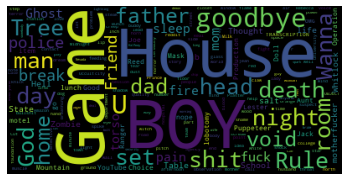

In [37]:
corpus_info(spacy_noun)

Total tokens: 53474
Vocabulary size: 2702
Most common words: be have do go s get see say look know
Wordcloud:


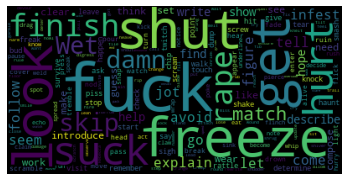

In [38]:
corpus_info(spacy_verb)

Total tokens: 34530
Vocabulary size: 2925
Most common words: up just not out so back then there more now
Wordcloud:


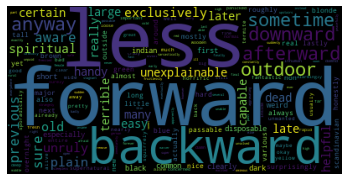

In [39]:
corpus_info(spacy_mod)